# Overview of vector calculus    

## Introduction   

An understanding of **vector calculus** is essential to working with common data science, machine learning, including AI algorithms. Functions of more than one variable are vector valued. Such functions are common in data science and machine learning. In simple terms, vector calculus is **calculus applied to vector valued functions**. .   

Many data science and machine lerning problems require minimizing or maximizing a vector valued function. These foundational algorithms are based on the **gradient** of a function. The behavior of the gradient can be understood by looking at the **Hessian** that tells one about the curvature of the gradient. 

An optimum (maximum or minimum) of a vector is found when the graident is zero. At a maximum, the curvature is negative, and at a minimum. the curvature is positive.   

## A Simple Example   

To make these concepts more concrete through a simple 1-dimensional example. This 1-demensional example is based on a function of just a single variable. We will expand on these the concepts presented to multiple dimensions at the end of this notebook.   
    
For this example, we will with with a simple 1-dimensional function, a parabola:     

$$y=x^2$$     

The gradient of this function is simply computed as:      

$$\frac{dy}{dx} = \frac{d\ x^2}{d x} = 2x$$

The gradient is $0$ at $x = 0$. To determine if this is a minimum of a maximum we must compute the second derivative of curvature of the function:     
$$\frac{d^2y}{dx^2} = 2$$

The second derivative, or the curvature, is a constant. Since the curvature is postive $x = 0$ must be a minimum.   

Execute the code in the cell below to plot the function, the gradient and the second derivative

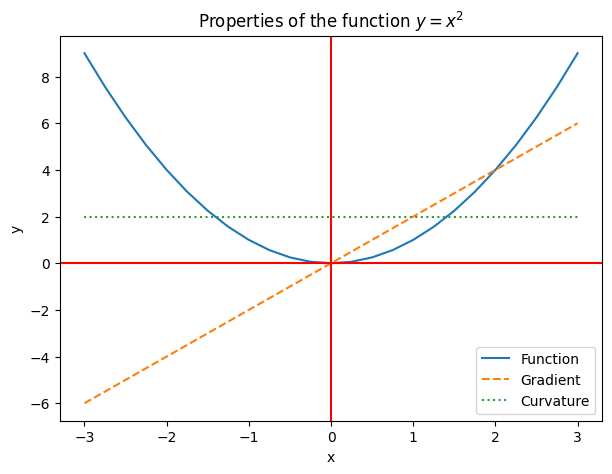

In [1]:
import matplotlib.pyplot as plt  
import numpy as np

x = np.arange(-3.0, 3.25, 0.25)

_, ax = plt.subplots(figsize=(7,5))
ax.plot(x, x**2.0, label='Function');
ax.plot(x,2*x, linestyle='dashed', label='Gradient');
ax.plot(x, [2.0]*len(x), linestyle='dotted', label='Curvature');
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('Properties of the function $y = x^2$')
ax.axvline(ymin=-10,ymax=25, c='Red');
ax.axhline(xmin=-5,xmax=5, c='Red');
plt.legend();

Examine the plot noting the following.   
1. The minimum is at $x = 0$.    
2. The gradient is is $0$ at $x = 0$, and becomes positive for $x > 0$ and negative for $x < 0$.    
3. The curvature is constant and positive, indicatng there is only a minimum for this function.  

## Gradient Descent to MInimum

**Gradient descent** algorithms are often used to find maximum and minimum of complex functions. The basic idea is to follow the gradient of a function until it approaches zero. Gradient descent take a series of small steps, determined by a **learning rate**, $\alpha$, in the direction of the gradient at the current point. In mathematical terms we can write the update equation from value $x_{n-1}$ to value $x_n$ as:    

$$x_n = x_{n-1} - \alpha\ grad(x_{n-1})$$

Since gradient descent is an approximate numerical algorithm, it is highly unlikely that the algorithm will even actually find the point where the gradinet is exactly 0. Therefore we use a **stopping criteria** to determine when the approximation is good enough to stop. For example, we can run the algorithm until the gradient is less than some small number.     

The `gradient_descent` function in the code cell below implements a simple 1-dimensional version of the algorithm. Notice the following about this code:   
1. The `while` loop runs until the error tolerance or stopping condition is reached. Starting at an intial condition, $x_0$, the value of $x$ is updated using the relationship shown above.    
2. The gradient for the new value of x is then computed by calling a Python lambda, or anonymous function. 
3. The values of the parameter $x$ and the gradient are then computed.    

Execute the code in the cell below and examine the results.    

Final x = -0.004992651004795885
Gradient at termination = -0.004992651004795885


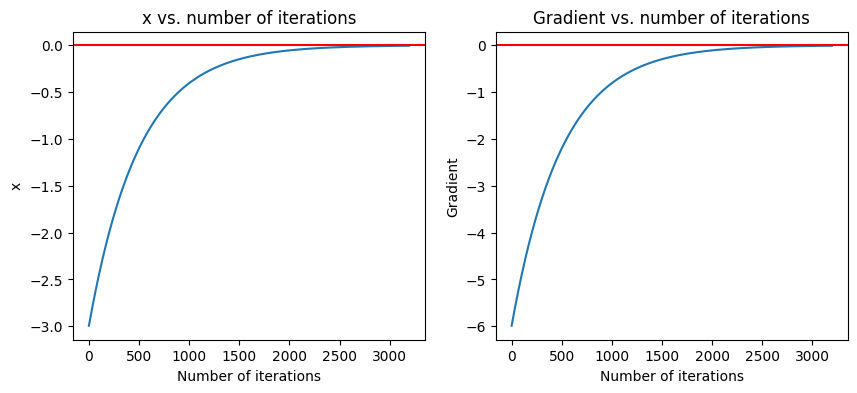

In [2]:
def plot_trajectory(x_values, grad_values):   
    n_steps = len(x_values)
    _, ax = plt.subplots(1, 2, figsize=(10,4))
    ax = ax.flatten()
    ax[0].plot(range(n_steps), x_values);
    ax[0].axhline(xmin=0,xmax=n_steps, c='Red');
    ax[0].set_xlabel('Number of iterations')
    ax[0].set_ylabel('x')
    ax[0].set_title('x vs. number of iterations')
    ax[1].plot(range(n_steps), grad_values);
    ax[1].axhline(xmin=0,xmax=n_steps, c='Red');
    ax[1].set_xlabel('Number of iterations')
    ax[1].set_ylabel('Gradient')
    ax[1].set_title('Gradient vs. number of iterations')


def gradient_descent(x0, alpha, tollerance = 0.01):
    gradient = grad(x0) 
    x=x0
    x_out = []
    grad_out = []
    while(abs(gradient) > tollerance):         
        x = x - alpha * gradient
        gradient = grad(x)
        x_out.append(x)
        grad_out.append(gradient)
    return x_out, grad_out  

grad = lambda x: 2*x    

x0 = -3
alpha = 0.001
x_values, grad_values = gradient_descent(x0, alpha)

plot_trajectory(x_values, grad_values)
print('Final x = ' + str(x_values[len(x_values)-1]))
print('Gradient at termination = ' + str(x_values[len(grad_values)-1]))

Notice the following properties of the gradient descent algorithm evident in these plots:     
1. The algorithm finds a good approximation with $x \approx 0$.
2. Since we have selected a relatively small learning rate was chosen, the algorithm converges slowly.     
3. Gradient does indeed approach close to 0 at termination of the algorithm.      

In the above experiment we started with an intial conditon of $x_0 = -3$. What if we use a positive initial condition like $x_0 = 3$. To find out, execute the code in the cell below.

Final x = 0.004992651004795885
Gradient at termination = 0.004992651004795885


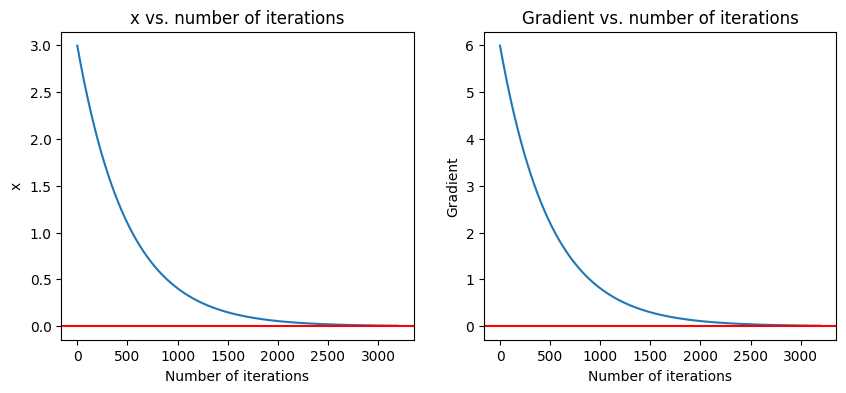

In [3]:
x0 = 3
x_values, grad_values = gradient_descent(x0, alpha)

plot_trajectory(x_values, grad_values)
print('Final x = ' + str(x_values[len(x_values)-1]))
print('Gradient at termination = ' + str(x_values[len(grad_values)-1]))

These resutls are nearly idendentical to the first set. Only the sign of the values of $x$ and the gradient has changed. This should not be surprising, since the parabolic function is symmetric about the minimum. 

## A Multi-dimensional Example      

To continue our exploration of vector calculus with a 2-dimenstional example. For this example, we will work with the following function of a vector of 2 variables:     

$$
z( \vec{v}) = z(x,y) = -3 x^2 -5 y^2
$$

We can find the gradient of this vector as follows, by taking all possible derivatives of $z(\vec{v})$ with respect to the variables $x,y$:      

$$
grad \big( z(\vec{v}) \big) =  \nabla_{\vec{v}} z(\vec{v}) = 
\begin{pmatrix}
  \frac{\partial z(\vec{v})}{\partial x}\\
   \frac{\partial z(\vec{v})}{\partial y} 
 \end{pmatrix} = 
\begin{pmatrix}
  -6 x\\
  -10 y 
 \end{pmatrix} 
 $$
 
 How can we understand this result? There are two dimensions that can be interpreted as:   
 1. The value of $z$ decreases by 6 units (slope of -6) for every unit increase in the value of $x$.     
 1. The value of $z$ decreases by 10 units (slope of -10) for every unit increase in the value of $y$.    
 
 The gradient of this function has only one zero at $[x,y] =[0,0]$. The question is if this is a maximum or a minimum and how strongly is the function curved at this point. To find out, we must compute the **Hessian** of the function. The Hessian matrix for this function can be computed by computing all the possible partiqal    
 
 $$
 Hes \big( z(\vec{v}) \big) = \nabla^2_{\vec{v}} z(\vec{v}) = 
 \begin{pmatrix}
  \frac{\partial^2 z(\vec{v})}{\partial x^2},     \frac{d z^2(\vec{v})}{\partial x \partial y}\\
  \frac{\partial^2 z(\vec{v})}{\partial x \partial y}, \frac{\partial^2 z(\vec{v})}{\partial y^2} 
 \end{pmatrix} =
\begin{pmatrix}
  -6,\ \ 0\\
  0,\ \ -10 
 \end{pmatrix} 
 $$    
 
 At $[x,y] =[0,0]$, the Hessian or curvature is:     
 
$$
\nabla^2_{\vec{v}} z(\vec{v}) =  
\begin{pmatrix}
  -6,\ \ 0\\
  0,\ \ -10 
 \end{pmatrix} 
$$  
 
 The diagonal elements of the Hessian are both negative, making $[x,y] =[0,0]$ a maximum.   
 
 We can easily verify that maximum of $z(\vec{v})$ is well determined by computing the eigenvalues. Execute the code in the cell below to compute and display these eigenvalues.   

In [4]:
Hess = np.array([[-6,0],
               [0,-10]])
eigenvalues, eigenvectors = np.linalg.eig(Hess)
eigenvalues

array([ -6., -10.])

Notice two points here:    
1. As expected the absolute values of the eigenvalues are quite large, indicating the maximum is well determined.   
2. The eigenvalues are the values of the diagonal Hessian matrix. 

#### Copyright 2023, Stephen F Elston. All rights reserved.  